# 5. Bar charts

Bar charts are very common, but that is no reason to avoid them. If anything, they are even more beneficial because readers immediately know how to interpret the visualization.

In this notebook, we will go through a simple example involving the 100% bar chart visualization. Although this visualization can be created easily with matplotlib, Multiplex includes helper functions so you can create these visualizations faster.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

The first example uses data from [the International Energy Agency](https://www.iea.org/data-and-statistics?fuel=Energy%20supply&indicator=Electricity%20generation%20by%20source) to show how different regions generate power. Although a normal bar chart would do, a 100% bar chart makes it clearer how the energy trends are different from one region to another.

As usual, first we read the data. The included dataset contains information about energy sources from China, the European Union and the United States. We compare only five energy sources: coal, oil, natural gas, nuclear and renewable energy sources.

In [2]:
# load the data
df = pd.read_csv('data/energy.csv')
df.set_index('Region', inplace=True)
df

,Coal,Oil,Natural Gas,Nuclear,Renewable
Region,,,,,
China,4508568,10278,196400,248070,1708612
European Union,709362,60660,663311,829719,1035872
United States,1254542,38825,1513414,841329,786799


To draw the 100% bar chart, call the `draw_bar_100` function on the Drawable.
With this function, we can draw each region, one after the other.
This function requires two arguments: a list of values and the name of the bar (in our case, that's the region). Other arguments and keyword arguments can be used to style the bars.

Multiplex automatically converts the values to percentages for you.
It also makes some small changes to the plot to make it more appropriate for the 100% bar chart:

- It moves the x-axis ticks and the label to the top of the plot,
- It removes any grid on the plot, and
- It automatically creates the x-axis tick labels.

> Do you want to style the plot yourself? Disable the automatic styling by passing on `style_plot=False` to the `draw_bar_100` function.

We have already loaded the data. To draw the first visualization, we follow the usual path:

1. We import the Drawable and the style,
2. We create a general style, and
3. We draw the visualization.

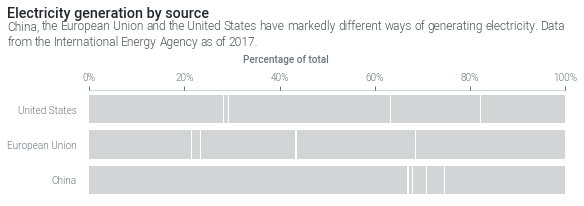

In [3]:
# import the Drawable class and set the style
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# create a general style
style = { 'alpha': 0.2, 'color': 'C0' }

# draw the visualization
figure = plt.figure(figsize=(10, 2))
viz = drawable.Drawable(figure)

for region in df.index:
    viz.draw_bar_100(df.loc[region].tolist(), region, **style)

# finalize the plot
viz.set_xlabel('Percentage of total')
viz.set_title('Electricity generation by source', loc='left')
viz.set_caption("""China, the European Union and the United States have markedly different ways of generating electricity.
                   Data from the International Energy Agency as of 2017.""", align='justify')
viz.show()

That was easy... but not very expressive. Like other Multiplex visualizations, you can customize the plot by specifying styles for each value. It is very simple and easy to override the style.

In the next example, we highlight what proportion of energy comes from natural gas. The only thing that we change is that instead of providing the natural gas as a value, we provide it as a dictionary.

The dictionary must have, at least, a `value` key. The styling options go into the `style` key. As usual, the general style is used unless the specific style overrides it.

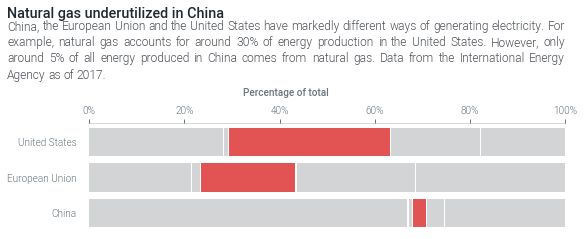

In [4]:
# create a specific style to highlight natural gas values
highlight = { 'color': 'C1', 'alpha': 0.75 }

# draw the visualization
figure = plt.figure(figsize=(10, 2))
viz = drawable.Drawable(figure)
for region in df.index:
    values = df.loc[region].tolist()
    values[2] = { 'value': values[2], 'style': highlight } # highlight the natural gas value
    viz.draw_bar_100(values, region, **style)

# customize the plot
viz.set_xlabel('Percentage of total')
viz.set_title('Natural gas underutilized in China', loc='left')
viz.set_caption("""China, the European Union and the United States have markedly different ways of generating electricity.
                   For example, natural gas accounts for around 30% of energy production in the United States.
                   However, only around 5% of all energy produced in China comes from natural gas.
                   Data from the International Energy Agency as of 2017.""", align='justify')
viz.show()

That's better, isn't it?

While highlighting the natural gas helps us tell _our_ story, it would be useful to allow readers to interpret the bar chart themselves. To do that, we add a legend.

To add a legend, we need to give bars a label. Like before, we convert the values to dictionaries. Remember, the dictionaries must have a `value` key! We also add a `label` key.

With Multiplex, you can also style the legend labels. You can pass a general `label_style` dictionary to the `draw_bar_100` function. You can set specific label styles for particular labels by setting the `label_style` key in the value dictionary.

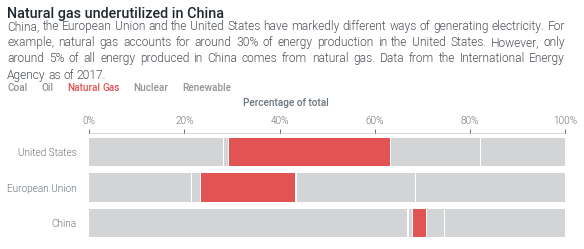

In [5]:
# create a general style for the labels
label_style = { 'alpha': 0.5, 'fontweight': '500' }

# create a specific style to highlight natural gas labels
highlight_label_style = { 'alpha': 0.75 }

# draw the visualization
figure = plt.figure(figsize=(10, 2))
viz = drawable.Drawable(figure)
labels = df.loc[region].keys()
for region in df.index:
    values = df.loc[region].tolist()
    values = [ { 'value': value, 'label': label  }
               for value, label in zip(values, labels) ] # convert all values to dictionaries
    values[2]['style'] = highlight # highlight the natural gas value
    values[2]['label_style'] = highlight_label_style # highlight the natural gas label
    viz.draw_bar_100(values, region, label_style=label_style,  **style)

# customize the plot
viz.set_xlabel('Percentage of total')
viz.set_title('Natural gas underutilized in China', loc='left')
viz.set_caption("""China, the European Union and the United States have markedly different ways of generating electricity.
                   For example, natural gas accounts for around 30% of energy production in the United States.
                   However, only around 5% of all energy produced in China comes from natural gas.
                   Data from the International Energy Agency as of 2017.""", align='justify')
viz.savefig('exports/5-natural-gas.png', dpi=300, bbox_inches='tight')

You can learn more about bar chart visualizations, including functionality that was not covered in this tutorial, on [Multiplex's documentation site](https://nicholasmamo.github.io/multiplex-plot/bar.html).
You can continue learning about Multiplex in the [slope graphs tutorial](https://github.com/NicholasMamo/multiplex-plot/blob/master/examples/6.%20Slope%20graphs.ipynb).